# Google Playstore Case Study

**Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps? 
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?


In [1]:
#import the libraries
import numpy as np
import pandas as pd

In [2]:
#read the dataset and check the first five rows
inp0 = pd.read_csv('googleplaystore_v2.csv' , header = 0)
inp0.head()


App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews     Size     Installs  Type Price Content Rating  \
0     159  19000.0      10,000+  Free     0       Everyone   
1     967  14000.0     500,000+  Free     0       Everyone   
2   87510   8700.0   5,000,000+  Free     0       Everyone   
3  215644  25000.0  50,000,000+  Free     0           Teen   
4     967   2800.0     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [3]:
#Check the shape of the dataframe
inp0.shape

(10841, 13)

In [4]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column
 

In [5]:
#Check the datatypes of all the columns of the dataframe
inp0.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### Missing Value Treatment

In [6]:
#Check the number of null values in the columns
inp0.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling missing values for rating
 - Ratings is the target variable
 - drop the records

In [7]:
#Drop the rows having null values in the Rating field
inp2 = inp0[~inp0['Rating'].isnull()]
inp2.shape


(9367, 13)

In [8]:
# Check the number of nulls in the Rating field again to cross-verify
inp2.Rating.isnull().sum()

0

In [9]:
#Question
#Check the number of nulls in the dataframe again and find the total number of null values
inp2.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [10]:
#Drop the error row from the android version.
inp2[inp2['Android Ver'].isnull()]


App         Category  Rating  \
4453                    [substratum] Vacuum: P  PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]  PERSONALIZATION     4.5   
10472  Life Made WI-Fi Touchscreen Photo Frame              1.9    19.0   

      Reviews          Size Installs  Type     Price Content Rating  \
4453      230  11000.000000   1,000+  Paid     $1.49       Everyone   
4490      189   2100.000000  10,000+  Free         0       Everyone   
10472    3.0M  21516.529524     Free     0  Everyone            NaN   

                  Genres    Last Updated Current Ver Android Ver  
4453     Personalization   July 20, 2018         4.4         NaN  
4490     Personalization  March 27, 2018         1.1         NaN  
10472  February 11, 2018          1.0.19  4.0 and up         NaN

In [11]:
# Drop and Check the nulls again in Android version column to cross-verify
inp2[(inp2['Android Ver'].isnull() & (inp2.Category == '1.9'))]

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

               Size Installs Type     Price Content Rating             Genres  \
10472  21516.529524     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

In [12]:
inp2 = inp2[~(inp2['Android Ver'].isnull() & (inp2.Category == '1.9'))]

In [13]:
inp2[inp2['Android Ver'].isnull()]

App         Category  Rating Reviews     Size  \
4453  [substratum] Vacuum: P  PERSONALIZATION     4.4     230  11000.0   
4490    Pi Dark [substratum]  PERSONALIZATION     4.5     189   2100.0   

     Installs  Type  Price Content Rating           Genres    Last Updated  \
4453   1,000+  Paid  $1.49       Everyone  Personalization   July 20, 2018   
4490  10,000+  Free      0       Everyone  Personalization  March 27, 2018   

     Current Ver Android Ver  
4453         4.4         NaN  
4490         1.1         NaN

Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [14]:
#Check the most common value in the Android version column
inp2['Android Ver'].value_counts().idxmax()

'4.1 and up'

In [15]:
#Fill up the nulls in the Android Version column with the above value
inp2['Android Ver'] = inp2['Android Ver'].fillna(inp2['Android Ver'].value_counts().idxmax())

In [16]:
inp2['Android Ver'].value_counts()

4.1 and up            2061
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [17]:
#Check the nulls in the Android version column again to cross-verify
inp2['Android Ver'].isnull().sum()

0

In [18]:
#Check the nulls in the entire dataframe again
inp2.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [19]:
#Check the most common value in the Current version column
inp2['Current Ver'].value_counts()

Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: Current Ver, Length: 2638, dtype: int64

In [20]:
# Check if there is any error in the null values of current version column
inp2[inp2['Current Ver'].isnull()]


App            Category  Rating Reviews  \
15    Learn To Draw Kawaii Characters      ART_AND_DESIGN     3.2      55   
1553             Market Update Helper  LIBRARIES_AND_DEMO     4.1   20145   
6322           Virtual DJ Sound Mixer               TOOLS     4.2    4010   
7333                      Dots puzzle              FAMILY     4.0     179   

         Size    Installs  Type  Price Content Rating            Genres  \
15     2700.0      5,000+  Free      0       Everyone      Art & Design   
1553     11.0  1,000,000+  Free      0       Everyone  Libraries & Demo   
6322   8700.0    500,000+  Free      0       Everyone             Tools   
7333  14000.0     50,000+  Paid  $0.99       Everyone            Puzzle   

           Last Updated Current Ver Android Ver  
15         June 6, 2018         NaN  4.2 and up  
1553  February 12, 2013         NaN  1.5 and up  
6322       May 10, 2017         NaN  4.0 and up  
7333     April 18, 2018         NaN  4.0 and up

In [21]:
#Replace the nulls in the Current version column with the above value
inp2['Current Ver'] = inp2['Current Ver'].fillna(inp2['Current Ver'].value_counts().idxmax())

In [22]:
# Question : Check the most common value in the Current version column again
inp2['Current Ver'].value_counts()

Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: Current Ver, Length: 2638, dtype: int64

### Handling Incorrect Data Types 

In [23]:
#Check the datatypes of all the columns 
inp2.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [24]:
inp2.head(3)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   

  Reviews     Size    Installs  Type Price Content Rating  \
0     159  19000.0     10,000+  Free     0       Everyone   
1     967  14000.0    500,000+  Free     0       Everyone   
2   87510   8700.0  5,000,000+  Free     0       Everyone   

                      Genres      Last Updated Current Ver   Android Ver  
0               Art & Design   January 7, 2018       1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up  
2               Art & Design    August 1, 2018       1.2.4  4.0.3 and up

In [25]:
#Analyse the Price column to check the issue

inp2.Price.value_counts()

0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: Price, Length: 73, dtype: int64

In [26]:
#Write the function to make the changes

inp2.Price = inp2.Price.apply(lambda x: 0 if x == '0' else float(x[1:]))

In [27]:
#Verify the dtype of Price once again

inp2.Price.dtype

dtype('float64')

In [28]:
inp2.Price.value_counts()

0.00      8719
2.99       114
0.99       107
4.99        70
1.99        59
          ... 
1.29         1
299.99       1
379.99       1
37.99        1
1.20         1
Name: Price, Length: 73, dtype: int64

In [29]:
#Question - Try calculating the average price of all apps having the Android version as "4.1 and up" 
inp2[ (inp2['Android Ver'] == '4.1 and up') & (inp2['Price'] > 0) ].describe()


Rating           Size       Price
count  107.000000     107.000000  107.000000
mean     4.352336   27541.890058   15.778411
std      0.442409   24048.078581   65.803066
min      2.300000      24.000000    0.990000
25%      4.100000    6650.000000    1.870000
50%      4.400000   21516.529524    2.990000
75%      4.650000   39500.000000    5.240000
max      5.000000  100000.000000  400.000000

In [30]:
#Analyse the Reviews column
inp2.Reviews.value_counts()

2         83
3         78
4         74
5         74
1         67
          ..
49657      1
41420      1
7146       1
44706      1
398307     1
Name: Reviews, Length: 5992, dtype: int64

In [31]:
#Change the dtype of this column
inp2.Reviews = inp2.Reviews.astype('int32')

#Check the quantitative spread of this dataframe
inp2.Reviews.describe()


count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [32]:
#Analyse the Installs Column
inp2.Installs.value_counts()


1,000,000+        1577
10,000,000+       1252
100,000+          1150
10,000+           1010
5,000,000+         752
1,000+             713
500,000+           538
50,000+            467
5,000+             432
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [33]:
#Question Clean the Installs Column and find the approximate number of apps at the 50th percentile.
inp2.Installs = inp2.Installs.apply( lambda x: x.replace(',' , '').replace('+' , ''))

inp2.Installs = inp2.Installs.apply(lambda x: int(x))

In [34]:
inp2.Installs.dtype

dtype('int64')

In [35]:
inp2.Installs.value_counts()

1000000       1577
10000000      1252
100000        1150
10000         1010
5000000        752
1000           713
500000         538
50000          467
5000           432
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

In [36]:
inp2.Installs.iloc[49]

1000000

In [37]:
inp2.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.


In [38]:
#Perform the sanity checks for the Rating column
inp2.Rating.describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [39]:
#Perform the sanity checks on the Reviews column
inp2[inp2['Rating'] >= inp2['Installs']]

App             Category  \
2450                                   Tablet Reminder              MEDICAL   
2454                               KBA-EZ Health Guide              MEDICAL   
2459   Anatomy & Physiology Vocabulary Exam Review App              MEDICAL   
2484                                 Clinic Doctor EHr              MEDICAL   
5917                                          Ra Ga Ba                 GAME   
6700                                  Brick Breaker BR                 GAME   
7147                                         CB Heroes               SOCIAL   
7731                                           CQ ESPM             BUSINESS   
8146                                           CZ-Help  BOOKS_AND_REFERENCE   
9218                               EB Cash Collections             BUSINESS   
10697                                          Mu.F.O.                 GAME   

       Rating  Reviews     Size  Installs  Type  Price Content Rating  \
2450      5.0        4   2500.0         5  Free   0.00       Everyone   
2454      5.0        4  25000.0         1  Free   0.00       Everyone   
2459      5.0        1   4600.0         5  Free   0.00       Everyone   
2484      5.0        2   7100.0         5  Free   0.00       Everyone   
5917      5.0        2  20000.0         1  Paid   1.49       Everyone   
6700      5.0        7  19000.0         5  Free   0.00       Everyone   
7147      5.0        5   1800.0         5  Free   0.00       Everyone   
7731      5.0        2   3400.0         5  Free   0.00       Everyone   
8146      5.0        2   1400.0         5  Free   0.00       Everyone   
9218      5.0        1   4300.0         5  Free   0.00       Everyone   
10697     5.0        2  16000.0         1  Paid   0.99       Everyone   

                  Genres      Last Updated Current Ver   Android Ver  
2450             Medical    August 3, 2018         1.0    4.1 and up  
2454             Medical    August 2, 2018      1.0.72  4.0.3 and up  
2459             Medical    August 2, 2018         2.0    4.0 and up  
2484             Medical    August 3, 2018  1.0.51.0.3    8.0 and up  
5917              Arcade  February 8, 2017       1.0.4    2.3 and up  
6700              Arcade     July 23, 2018         1.0    4.1 and up  
7147              Social    August 4, 2018       1.2.4    5.0 and up  
7731            Business      June 3, 2017       1.0.1    4.1 and up  
8146   Books & Reference     July 13, 2018         0.1    4.4 and up  
9218            Business     July 31, 2018        1.10    4.4 and up  
10697             Arcade     March 3, 2017         1.0    2.3 and up

In [40]:
inp2 = inp2[inp2.Reviews <= inp2.Installs]

In [41]:
#perform the sanity checks on prices of free apps 
inp2[ (inp2.Type == 'Free') & (inp2.Price > 0)]

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

#### Outliers Analysis Using Boxplot

- Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.
- In the former case, you should determine whether or not removing them would add value to your analysis procedure.

In [42]:
#import the plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


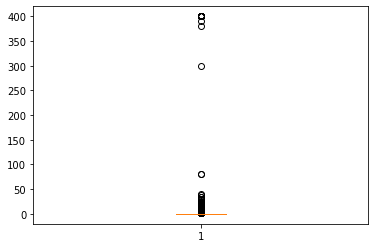

In [43]:
#Create a box plot for the price column
plt.boxplot(inp2['Price'])
plt.show()

In [44]:
# Find the IQR for the price column
# Calculate Quartiles(using percentile):
Q1 = np.percentile(inp2.Price , 25)
Q3 = np.percentile(inp2.Price , 75)
IQR = (Q3 - Q1)
print(IQR)

0.0


In [45]:
inp2.Price.describe()

count    9359.000000
mean        0.961116
std        15.822478
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [46]:
#Check the apps with price more than 200
inp2[inp2.Price > 200]          # Seems like all these apps are junk and need to be removed

App   Category  Rating  Reviews     Size  \
4197          most expensive app (H)     FAMILY     4.3        6   1500.0   
4362                      💎 I'm rich  LIFESTYLE     3.8      718  26000.0   
4367        I'm Rich - Trump Edition  LIFESTYLE     3.6      275   7300.0   
5351                       I am rich  LIFESTYLE     3.8     3547   1800.0   
5354                  I am Rich Plus     FAMILY     4.0      856   8700.0   
5355                   I am rich VIP  LIFESTYLE     3.8      411   2600.0   
5356               I Am Rich Premium    FINANCE     4.1     1867   4700.0   
5357             I am extremely Rich  LIFESTYLE     2.9       41   2900.0   
5358                      I am Rich!    FINANCE     3.8       93  22000.0   
5359              I am rich(premium)    FINANCE     3.5      472    965.0   
5362                   I Am Rich Pro     FAMILY     4.4      201   2700.0   
5364  I am rich (Most expensive app)    FINANCE     4.1      129   2700.0   
5366                       I Am Rich     FAMILY     3.6      217   4900.0   
5369                       I am Rich    FINANCE     4.3      180   3800.0   
5373              I AM RICH PRO PLUS    FINANCE     4.0       36  41000.0   

      Installs  Type   Price Content Rating         Genres       Last Updated  \
4197       100  Paid  399.99       Everyone  Entertainment      July 16, 2018   
4362     10000  Paid  399.99       Everyone      Lifestyle     March 11, 2018   
4367     10000  Paid  400.00       Everyone      Lifestyle        May 3, 2018   
5351    100000  Paid  399.99       Everyone      Lifestyle   January 12, 2018   
5354     10000  Paid  399.99       Everyone  Entertainment       May 19, 2018   
5355     10000  Paid  299.99       Everyone      Lifestyle      July 21, 2018   
5356     50000  Paid  399.99       Everyone        Finance  November 12, 2017   
5357      1000  Paid  379.99       Everyone      Lifestyle       July 1, 2018   
5358      1000  Paid  399.99       Everyone        Finance  December 11, 2017   
5359      5000  Paid  399.99       Everyone        Finance        May 1, 2017   
5362      5000  Paid  399.99       Everyone  Entertainment       May 30, 2017   
5364      1000  Paid  399.99           Teen        Finance   December 6, 2017   
5366     10000  Paid  389.99       Everyone  Entertainment      June 22, 2018   
5369      5000  Paid  399.99       Everyone        Finance     March 22, 2018   
5373      1000  Paid  399.99       Everyone        Finance      June 25, 2018   

     Current Ver   Android Ver  
4197         1.0    7.0 and up  
4362       1.0.0    4.4 and up  
4367       1.0.1    4.1 and up  
5351         2.0  4.0.3 and up  
5354         3.0    4.4 and up  
5355       1.1.1    4.3 and up  
5356         1.6    4.0 and up  
5357         1.0    4.0 and up  
5358         1.0    4.1 and up  
5359         3.4    4.4 and up  
5362        1.54    1.6 and up  
5364           2  4.0.3 and up  
5366         1.5    4.2 and up  
5369         1.0    4.2 and up  
5373       1.0.2    4.1 and up

In [47]:
#Clean the Price column
inp2 = inp2[inp2.Price < 200]
inp2.Price.describe()

count    9344.000000
mean        0.334463
std         2.169925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

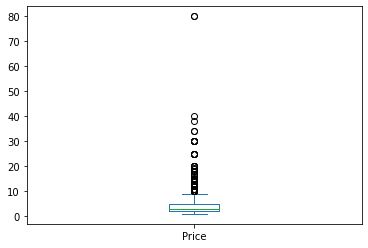

In [48]:
# Use the pandas library to plot the box of price column
inp2[inp2.Price > 0].Price.plot.box()  # this method is used by using pandas library,used only when conditions are applied
plt.show()


In [49]:
#Check the apps with price more than 30
inp2[inp2.Price > 30]

App   Category  Rating  Reviews     Size  \
2253  Vargo Anesthesia Mega App    MEDICAL     4.6       92  32000.0   
2301    A Manual of Acupuncture    MEDICAL     3.5      214  68000.0   
2365  Vargo Anesthesia Mega App    MEDICAL     4.6       92  32000.0   
2402    A Manual of Acupuncture    MEDICAL     3.5      214  68000.0   
2414               LTC AS Legal    MEDICAL     4.0        6   1300.0   
5360           I am Rich Person  LIFESTYLE     4.2      134   1800.0   

      Installs  Type  Price Content Rating     Genres     Last Updated  \
2253      1000  Paid  79.99       Everyone    Medical    June 18, 2018   
2301      1000  Paid  33.99       Everyone    Medical  October 2, 2017   
2365      1000  Paid  79.99       Everyone    Medical    June 18, 2018   
2402      1000  Paid  33.99       Everyone    Medical  October 2, 2017   
2414       100  Paid  39.99       Everyone    Medical    April 4, 2018   
5360      1000  Paid  37.99       Everyone  Lifestyle    July 18, 2017   

     Current Ver   Android Ver  
2253        19.0  4.0.3 and up  
2301      2.1.35    4.0 and up  
2365        19.0  4.0.3 and up  
2402      2.1.35    4.0 and up  
2414       3.0.1    4.1 and up  
5360         1.0  4.0.3 and up

In [50]:
#Clean the Price column again
inp2 = inp2[inp2.Price <= 30]
inp2.shape

(9338, 13)

### Histograms

Histograms can also be used in conjuction with boxplots for data cleaning and data handling purposes. You can use it to check the spread of a numeric variable. Histograms generally work by bucketing the entire range of values that a particular variable takes to specific __bins__. After that, it uses vertical bars to denote the total number of records in a specific bin, which is also known as its __frequency__.


In [51]:
?plt.hist      # Used to determine the details while plotting any graph

Object `plt.hist      # Used to determine the details while plotting any graph` not found.


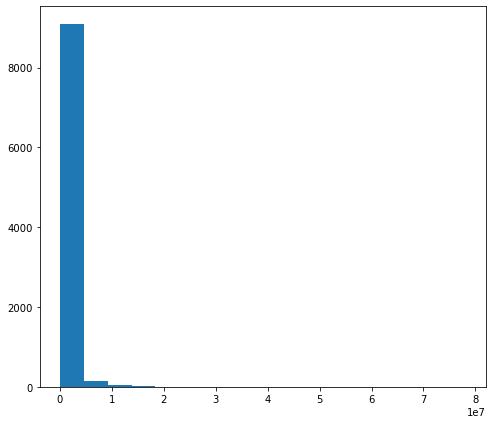

In [52]:
#Create a histogram of the Reviews
plt.figure(figsize = [8,7])
plt.hist(inp2.Reviews , bins = 17)
plt.show()

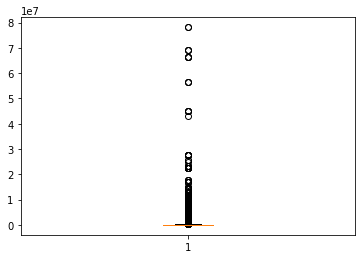

In [53]:
#Create a boxplot of the Reviews column
plt.boxplot(inp2.Reviews)
plt.show()

In [54]:
#Check records with 1 million reviews
inp2[inp2.Reviews >= 1000000]

App             Category  Rating  \
139                      Wattpad 📖 Free Books  BOOKS_AND_REFERENCE     4.6   
152                         Google Play Books  BOOKS_AND_REFERENCE     3.9   
189                               Uber Driver             BUSINESS     4.4   
194    OfficeSuite : Free Office + PDF Editor             BUSINESS     4.3   
201                    Facebook Pages Manager             BUSINESS     4.0   
...                                       ...                  ...     ...   
10190                         Fallout Shelter               FAMILY     4.6   
10200                  Facebook Pages Manager             BUSINESS     4.0   
10327                        Garena Free Fire                 GAME     4.5   
10636                      FRONTLINE COMMANDO                 GAME     4.4   
10707          Photo Editor Collage Maker Pro          PHOTOGRAPHY     4.5   

       Reviews          Size    Installs  Type  Price Content Rating  \
139    2914724  21516.529524   100000000  Free    0.0           Teen   
152    1433233  21516.529524  1000000000  Free    0.0           Teen   
189    1254730  21516.529524    10000000  Free    0.0       Everyone   
194    1002861  35000.000000   100000000  Free    0.0       Everyone   
201    1279184  21516.529524    50000000  Free    0.0       Everyone   
...        ...           ...         ...   ...    ...            ...   
10190  2721923  25000.000000    10000000  Free    0.0           Teen   
10200  1279800  21516.529524    50000000  Free    0.0       Everyone   
10327  5534114  53000.000000   100000000  Free    0.0           Teen   
10636  1351833  12000.000000    10000000  Free    0.0           Teen   
10707  1519671  21516.529524   100000000  Free    0.0       Everyone   

                  Genres      Last Updated         Current Ver  \
139    Books & Reference    August 1, 2018  Varies with device   
152    Books & Reference    August 3, 2018  Varies with device   
189             Business    August 3, 2018  Varies with device   
194             Business    August 2, 2018           9.7.14188   
201             Business    August 2, 2018  Varies with device   
...                  ...               ...                 ...   
10190         Simulation     June 11, 2018             1.13.12   
10200           Business    August 6, 2018  Varies with device   
10327             Action    August 3, 2018              1.21.0   
10636             Action  October 28, 2013               3.0.3   
10707        Photography  February 1, 2018  Varies with device   

              Android Ver  
139    Varies with device  
152    Varies with device  
189    Varies with device  
194            4.1 and up  
201    Varies with device  
...                   ...  
10190          4.1 and up  
10200  Varies with device  
10327        4.0.3 and up  
10636          2.1 and up  
10707  Varies with device  

[704 rows x 13 columns]

In [55]:
#Drop the above records
inp2 = inp2[inp2.Reviews <= 1000000 ]
inp2.shape


(8634, 13)

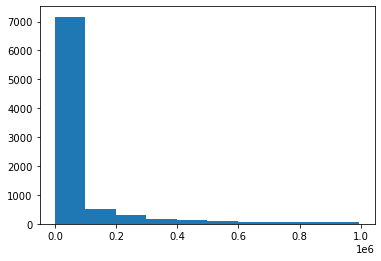

In [56]:
#Question - Create a histogram again and check the peaks
plt.hist(inp2.Reviews , bins = 10)
plt.show()


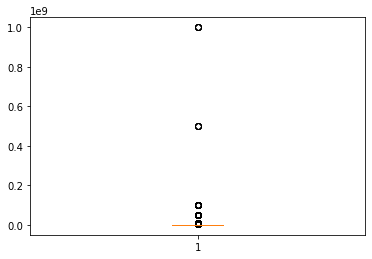

990000.0


In [57]:
#Question - Create a box plot for the Installs column and report back the IQR
plt.boxplot(inp2.Installs)
plt.show()
Q3 = np.percentile(inp2.Installs,75)
Q1 = np.percentile(inp2.Installs,25)
IQR = (Q3 - Q1)
print(IQR)


In [58]:
#Question - CLean the Installs by removing all the apps having more than or equal to 100 million installs
inp2 = inp2[inp2.Installs <= 100000000]
inp2.shape

(8624, 13)

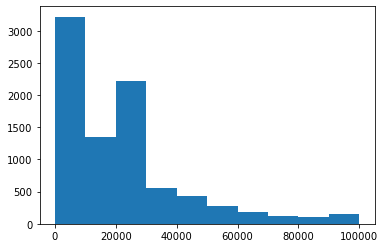

In [59]:
#Plot a histogram for Size as well.
plt.hist(inp2.Size , bins = 10)
plt.show()

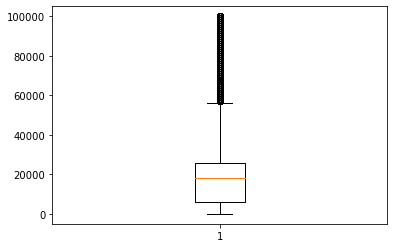

18000.0


In [60]:
#Question - Create a boxplot for the Size column and report back the median value
plt.boxplot(inp2.Size)
plt.show()
Q2 = np.percentile(inp2.Size , 50)
print(Q2)

### Difference Between Histograms and Bar plots

Situation A - You want to visualise the total number of runs scored by MS Dhoni in a single year against all the teams he has played against.

Situation B - You want to visualise the spread of the runs scored by MS Dhoni in a single year.

Situation A requires a bar plot whereas Situation B requires a histogram.



Answer:

A Histogram plots the frequency of a numeric variable, whereas the Bar plot shows the aggregation of a certain numerical entity for some categorical variable.

In Situation A, you are analysing the total sum of runs, which is a numeric variable for all the teams, which is a categorical variable. Hence it will need a bar plot. 

For Situation B, you're understanding the spread of a numeric variable by checking the frequency. 

Hence a histogram will be used here.

###  Data Visualisation with Seaborn

Seaborn is Python library to create statistical graphs easily. It is built on top of matplotlib and closely integrated with pandas.

_Functionalities of Seaborn_ :

- Dataset oriented API
- Analysing univariate and bivariate distributions
- Automatic estimation and plotting of  linear regression models
- Convenient views for complex datasets
- Concise control over style
- Colour palettes


In [61]:
#import the necessary libraries

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

#### Distribution Plots

In [62]:
inp2.head(3)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   

   Reviews     Size  Installs  Type  Price Content Rating  \
0      159  19000.0     10000  Free    0.0       Everyone   
1      967  14000.0    500000  Free    0.0       Everyone   
2    87510   8700.0   5000000  Free    0.0       Everyone   

                      Genres      Last Updated Current Ver   Android Ver  
0               Art & Design   January 7, 2018       1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up  
2               Art & Design    August 1, 2018       1.2.4  4.0.3 and up

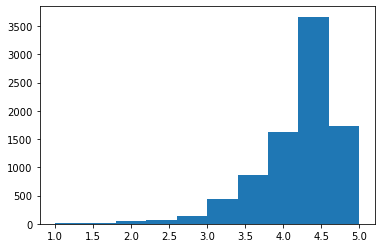

In [63]:
plt.hist(inp2.Rating)
plt.show()

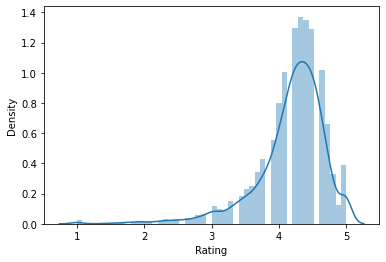

In [64]:
#Create a distribution plot for rating
sns.distplot(inp2.Rating)
plt.show()

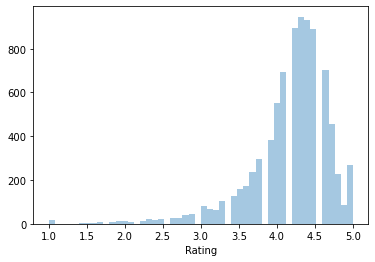

In [65]:
# Remove the KDE or curve
sns.distplot(inp2.Rating,kde = False)
plt.show()

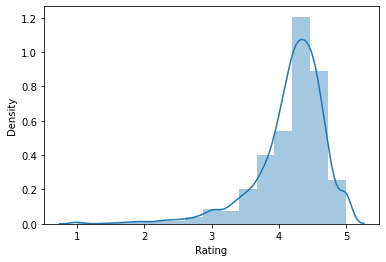

In [66]:
#Change the number of bins
sns.distplot(inp2.Rating , bins = 15)
plt.show()


Customise
To get the following view, which parameter needs to be set correctly?

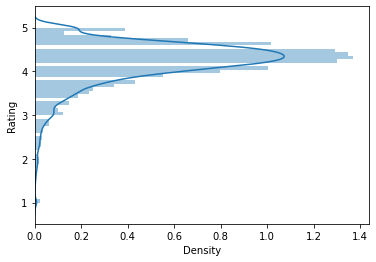

In [67]:
sns.distplot(inp2.Rating , vertical = True)
plt.show()

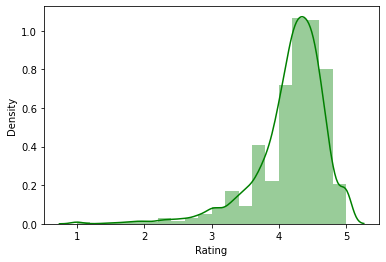

In [68]:
#Change the colour of bins to green
sns.distplot(inp2.Rating , bins = 20 , color = 'Green')
plt.show()

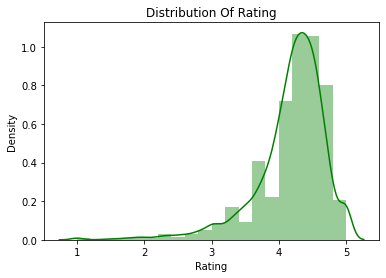

In [69]:
#Apply matplotlib functionalities
sns.distplot(inp2.Rating , bins = 20 , color = 'Green')
plt.title('Distribution Of Rating' , fontsize = 12)
plt.show()


In [70]:
#Check all the styling options
?sns.set_style

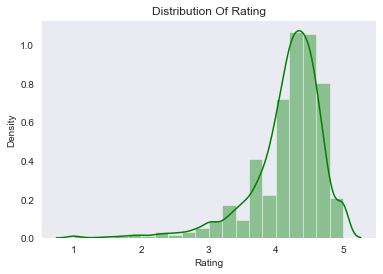

In [71]:
#Change the number of bins to 20
sns.set_style('dark')
sns.distplot(inp2.Rating , bins = 20 , color = 'Green')
plt.title('Distribution Of Rating' , fontsize = 12)
plt.show()


Matplotlib themes/styles:


In [72]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

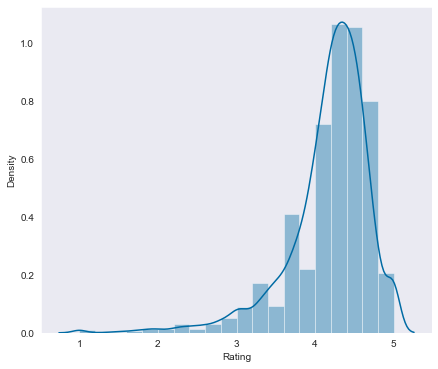

In [73]:
# After adding the matplotlib styling options, the settings are set for the subsequent charts
plt.style.use('tableau-colorblind10')
plt.figure(figsize = [7,6])
sns.distplot(inp2.Rating , bins = 20)
plt.show()

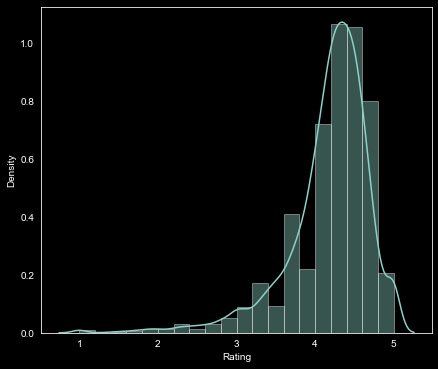

In [74]:
plt.style.use('dark_background')
plt.figure(figsize = [7,6])
sns.distplot(inp2.Rating , bins = 20)
plt.show()


In [75]:
# changing the settings back to default
plt.style.use('default')
%matplotlib inline

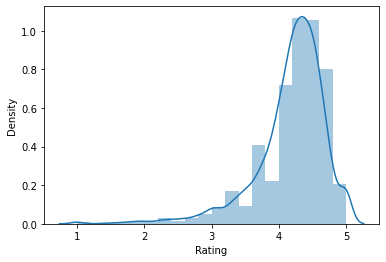

In [76]:
sns.distplot(inp2.Rating , bins = 20)
plt.show()

#### Pie-Chart and Bar Chart

In [77]:
#Analyse the Content Rating column
inp2['Content Rating'].value_counts()

Everyone           6938
Teen                928
Mature 17+          417
Everyone 10+        337
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [78]:
#Remove the rows with values which are less represented 
inp2 = inp2[~inp2['Content Rating'].isin(['Adults only 18+' ,'Unrated'])]

In [79]:
inp2.shape

(8620, 13)

In [80]:
#Reset the index
inp2.reset_index(inplace = True , drop = True)

In [81]:
#Check the apps belonging to different categories of Content Rating 
inp2['Content Rating'].value_counts()

Everyone        6938
Teen             928
Mature 17+       417
Everyone 10+     337
Name: Content Rating, dtype: int64

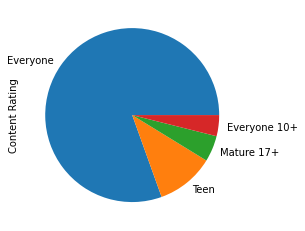

In [82]:
#Plot a pie chart using pandas series
inp2['Content Rating'].value_counts().plot.pie()
plt.show()


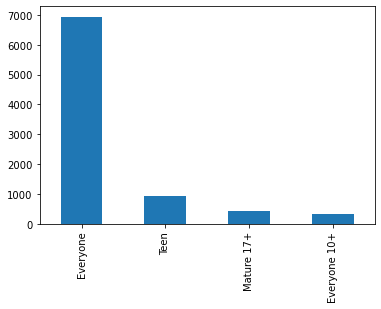

In [83]:
#Plot a bar chart
inp2['Content Rating'].value_counts().plot.bar()
plt.show()

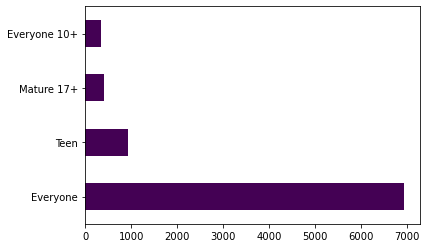

In [84]:
inp2['Content Rating'].value_counts().plot.barh(colormap = 'viridis')
plt.show()

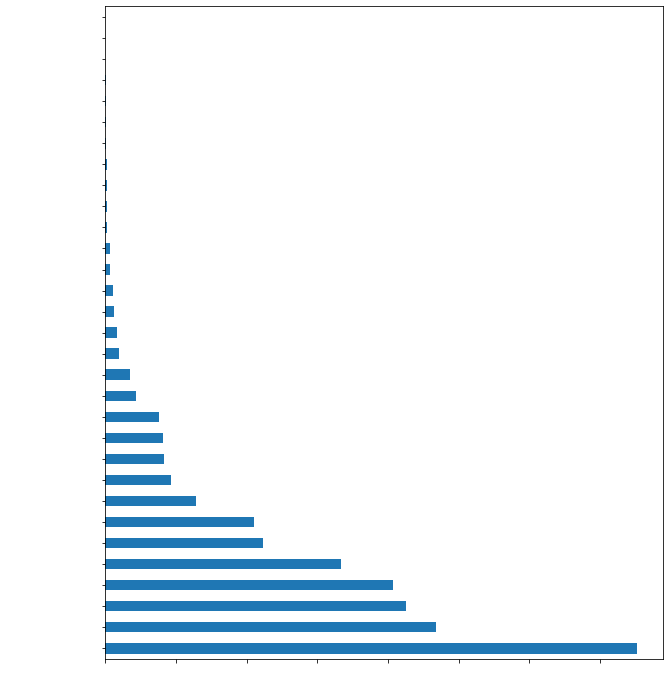

In [85]:
# Plot a bar chart for android version column and find out the 4th highest value
inp2['Android Ver'].value_counts().plot.barh(figsize = [10,12])
plt.xticks(c = 'White')
plt.yticks(c = 'White')
plt.show()

#### Scatter Plots

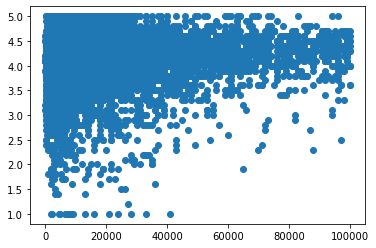

In [87]:
###Size vs Rating
plt.scatter(inp2.Size , inp2.Rating)
plt.show()


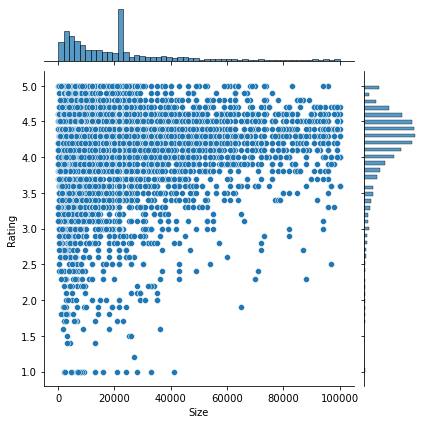

In [88]:
### Plot the same thing now using a jointplot
sns.jointplot(inp2.Size , inp2.Rating)
plt.show()

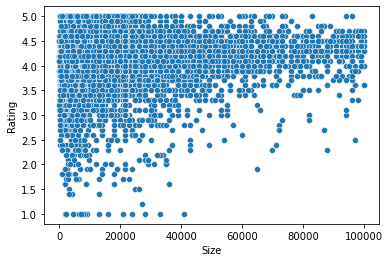

In [89]:
# To not include additional info like hist graphs along side, you can use sns.scatterplot()
sns.scatterplot(inp2.Size , inp2.Rating)
plt.show()

<Figure size 504x432 with 0 Axes>

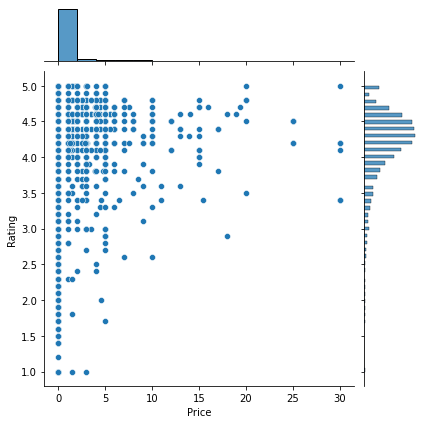

In [90]:
## Plot a jointplot for Price and Rating
plt.figure(figsize = [7,6])
sns.jointplot(inp2.Price , inp2.Rating)
plt.show()

**Reg Plots**

- These are an extension to the jointplots, where a regression line is added to the view 

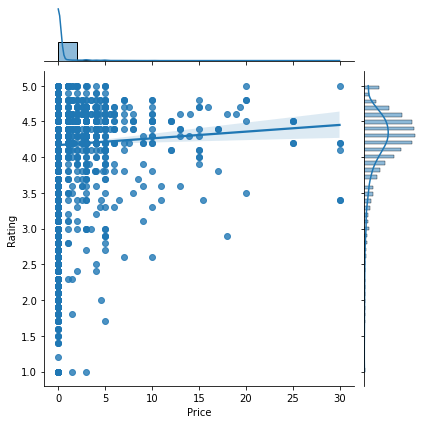

In [91]:
##Plot a reg plot for Price and Rating and observe the trend
sns.jointplot(inp2.Price , inp2.Rating , kind = 'reg')
plt.show()


In [92]:
inp2.head(3)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   

   Reviews     Size  Installs  Type  Price Content Rating  \
0      159  19000.0     10000  Free    0.0       Everyone   
1      967  14000.0    500000  Free    0.0       Everyone   
2    87510   8700.0   5000000  Free    0.0       Everyone   

                      Genres      Last Updated Current Ver   Android Ver  
0               Art & Design   January 7, 2018       1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up  
2               Art & Design    August 1, 2018       1.2.4  4.0.3 and up

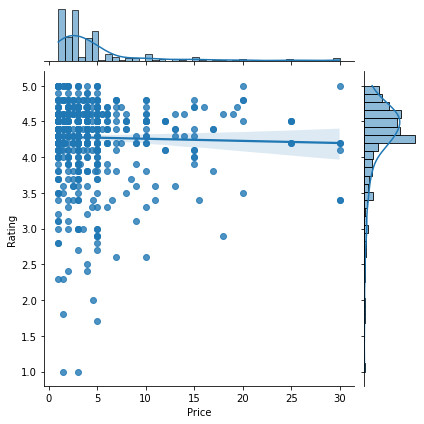

In [93]:
## Question - Plot a reg plot for Price and Rating again for only the paid apps.
inp3 = inp2[inp2.Type == 'Paid']
sns.jointplot(inp3.Price , inp3.Rating , kind = 'reg')
plt.show()

**Pair Plots**

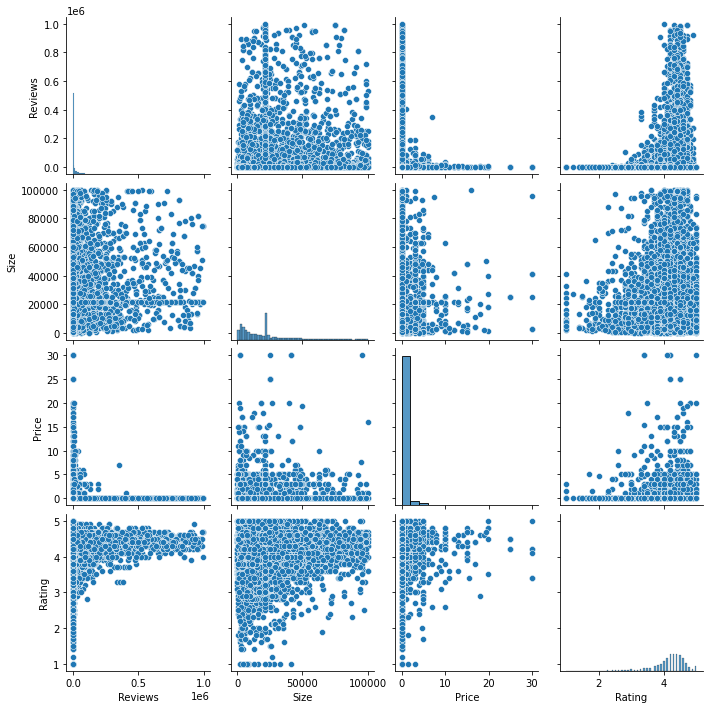

In [94]:
## Create a pair plot for Reviews, Size, Price and Rating
sns.pairplot(inp2[['Reviews' , 'Size' , 'Price' , 'Rating']])
plt.show()


**Bar Charts Revisited**

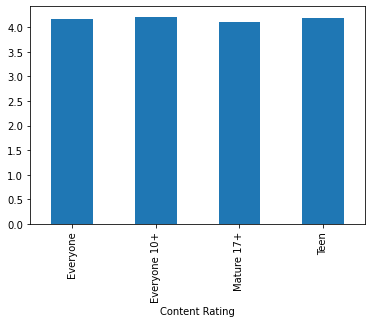

In [95]:
##Plot a bar plot of Content Rating vs Average Rating 
inp2.groupby('Content Rating')['Rating'].mean().plot.bar()
plt.show()

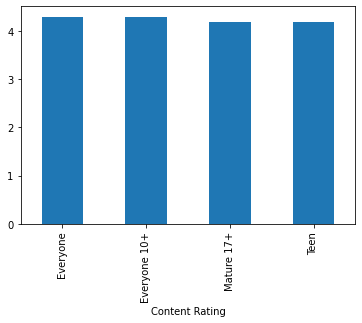

In [96]:
##Plot the bar plot again with Median Rating
inp2.groupby('Content Rating')['Rating'].median().plot.bar()
plt.show()

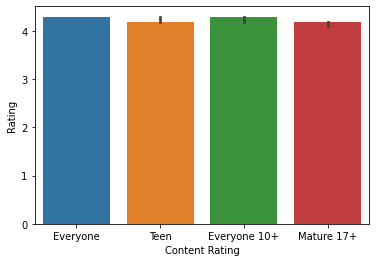

In [97]:
##Plot the above bar plot using the estimator parameter
sns.barplot(inp2['Content Rating'] , inp2['Rating'] , estimator = np.median)
plt.show()


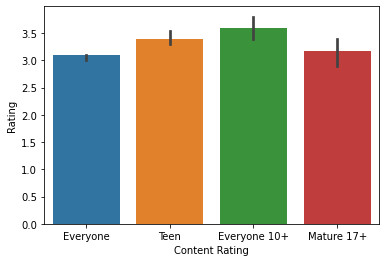

In [98]:
##Plot the bar plot with only the 5th percentile of Ratings
sns.barplot( inp2['Content Rating'] , inp2['Rating'] , estimator =lambda x: np.quantile(x , 0.05))
plt.show()

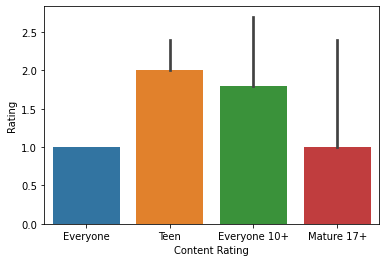

In [99]:
##Question - Plot the bar plot with the minimum Rating
sns.barplot(inp2['Content Rating'] , inp2['Rating'] , estimator = np.min)
plt.show()

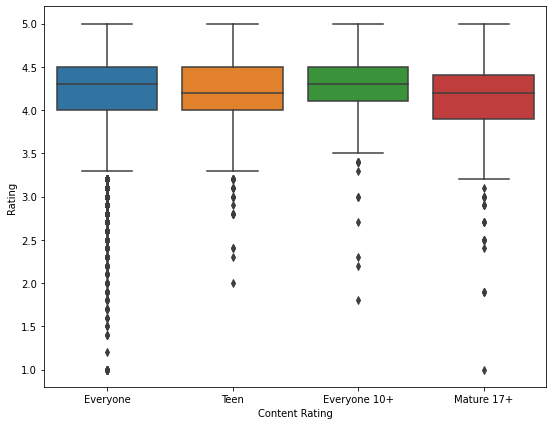

In [100]:
##Plot a box plot of Rating vs Content Rating
plt.figure(figsize = [9,7])
sns.boxplot(inp2['Content Rating'] , inp2.Rating)
plt.show()

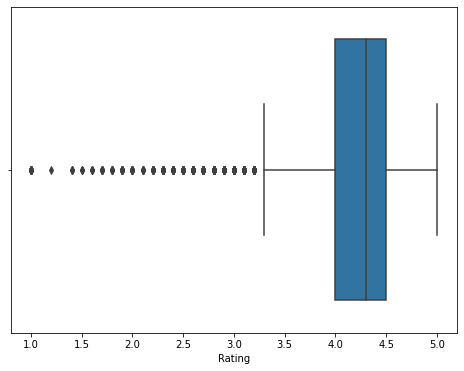

In [101]:
##Question - Plot a box plot for the Rating column only
plt.figure(figsize = [8,6])
sns.boxplot(inp2.Rating)
plt.show()

In [102]:
inp2.head(3)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   

   Reviews     Size  Installs  Type  Price Content Rating  \
0      159  19000.0     10000  Free    0.0       Everyone   
1      967  14000.0    500000  Free    0.0       Everyone   
2    87510   8700.0   5000000  Free    0.0       Everyone   

                      Genres      Last Updated Current Ver   Android Ver  
0               Art & Design   January 7, 2018       1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up  
2               Art & Design    August 1, 2018       1.2.4  4.0.3 and up

In [103]:
##Question - Plot a box plot of Ratings across the 4 most popular Genres
inp2.Genres.value_counts()

Tools                     694
Entertainment             508
Education                 464
Medical                   344
Finance                   315
                         ... 
Arcade;Pretend Play         1
Card;Brain Games            1
Lifestyle;Pretend Play      1
Comics;Creativity           1
Strategy;Creativity         1
Name: Genres, Length: 115, dtype: int64

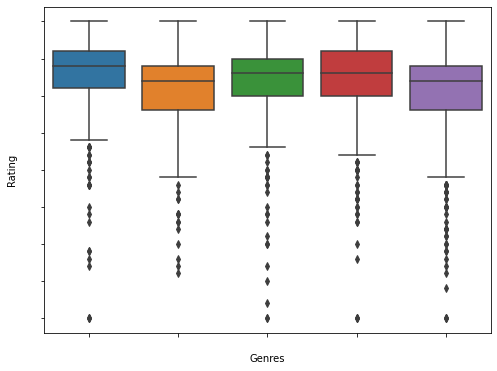

In [104]:
plt.figure(figsize = [8,6])
inp4 = inp2[inp2.Genres.isin(['Tools' , 'Entertainment' , 'Education' , 'Medical' , 'Finance'])]
plt.xticks(c = 'White')
plt.yticks(c = 'White')
sns.boxplot(inp4.Genres , inp2.Rating)
plt.show()

#### Heat Maps

#### What is the function of 'np.qcut' in Numpy

np.qcut() is used to divide a dataset into a specified number of groups, based on the quantiles of the data. 

This is useful for creating bins or categories in a dataset, where each bin represents a certain proportion of the data.

The function takes three main arguments:

x: The input array to be discretized.

q: The number of quantiles to divide the data into.

labels: Optional, specifies the labels for the quantiles. If not provided, the quantile values are used as labels.

In [105]:
##Ratings vs Size vs Content Rating
##Prepare buckets for the Size column using pd.qcut
inp2['Size_Bucket']  = pd.qcut(inp2.Size , [0 , 0.2 , 0.4 , 0.6 , 0.8 , 1] , ['Very Low' ,'Low' , 'Medium' , 'High' , 'Very high'])
inp2.head(3)


App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   

   Reviews     Size  Installs  Type  Price Content Rating  \
0      159  19000.0     10000  Free    0.0       Everyone   
1      967  14000.0    500000  Free    0.0       Everyone   
2    87510   8700.0   5000000  Free    0.0       Everyone   

                      Genres      Last Updated Current Ver   Android Ver  \
0               Art & Design   January 7, 2018       1.0.0  4.0.3 and up   
1  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up   
2               Art & Design    August 1, 2018       1.2.4  4.0.3 and up   

  Size_Bucket  
0      Medium  
1      Medium  
2         Low

In [106]:
##Create a pivot table for Size_buckets and Content Rating with values set to Rating
pd.pivot_table(inp2 , index = 'Content Rating' , columns = 'Size_Bucket' , values = 'Rating' )


Size_Bucket     Very Low       Low    Medium      High  Very high
Content Rating                                                   
Everyone        4.117536  4.158405  4.215784  4.170799   4.187302
Everyone 10+    4.189474  4.207407  4.238318  4.193443   4.217073
Mature 17+      3.978947  4.124211  4.021705  4.155172   4.193814
Teen            4.184848  4.233094  4.143310  4.198131   4.246154

In [107]:
##Change the aggregation to median
pd.pivot_table(inp2 , index = 'Content Rating' , columns = 'Size_Bucket' , values = 'Rating' , aggfunc = np.median)

Size_Bucket     Very Low  Low  Medium  High  Very high
Content Rating                                        
Everyone            4.20  4.3     4.3   4.3        4.3
Everyone 10+        4.10  4.3     4.3   4.3        4.3
Mature 17+          4.25  4.2     4.1   4.1        4.2
Teen                4.20  4.3     4.2   4.2        4.3

In [108]:
##Change the aggregation to 20th percentile
pd.pivot_table(inp2 , index = 'Content Rating' , columns = 'Size_Bucket' , values = 'Rating' , aggfunc = lambda x: np.quantile(x , 0.2))

Size_Bucket     Very Low   Low  Medium  High  Very high
Content Rating                                         
Everyone            3.80  3.80     4.0   3.8        3.9
Everyone 10+        3.86  3.92     4.1   4.0        4.0
Mature 17+          3.30  3.68     3.7   3.9        4.0
Teen                3.80  3.90     3.9   4.0        4.0

In [109]:
##Store the pivot table in a separate variable
rec = pd.pivot_table(inp2 , index = 'Content Rating' , columns = 'Size_Bucket' , values = 'Rating' , aggfunc = lambda x: np.quantile(x , 0.2))


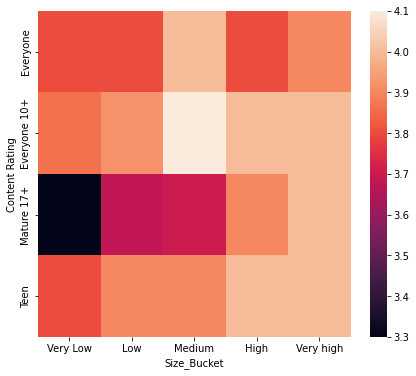

In [110]:
##Plot a heat map
plt.figure(figsize = [7,6])
sns.heatmap(rec)
plt.show()

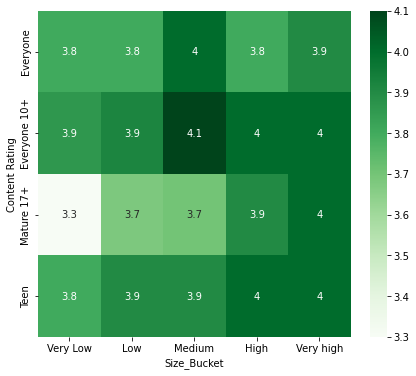

In [111]:
##Apply customisations
plt.figure(figsize = [7,6])
sns.heatmap(rec , cmap = 'Greens' , annot = True)
plt.show()

In [112]:
inp2.head(2)

App        Category  Rating  \
0  Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                             Coloring book moana  ART_AND_DESIGN     3.9   

   Reviews     Size  Installs  Type  Price Content Rating  \
0      159  19000.0     10000  Free    0.0       Everyone   
1      967  14000.0    500000  Free    0.0       Everyone   

                      Genres      Last Updated Current Ver   Android Ver  \
0               Art & Design   January 7, 2018       1.0.0  4.0.3 and up   
1  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up   

  Size_Bucket  
0      Medium  
1      Medium

#### Question - Replace Content Rating with Review_buckets in the above heat map
#### Keep the aggregation at minimum value for Rating


In [113]:
inp2['Reviews_Bucket'] = pd.qcut(inp2.Reviews , [0 , 0.2 , 0.4 , 0.6 , 0.8 , 1] , ['Very Low' ,'Low' , 'Medium' , 'High' , 'Very high'])

In [114]:
inp2.head(3)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   

   Reviews     Size  Installs  Type  Price Content Rating  \
0      159  19000.0     10000  Free    0.0       Everyone   
1      967  14000.0    500000  Free    0.0       Everyone   
2    87510   8700.0   5000000  Free    0.0       Everyone   

                      Genres      Last Updated Current Ver   Android Ver  \
0               Art & Design   January 7, 2018       1.0.0  4.0.3 and up   
1  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up   
2               Art & Design    August 1, 2018       1.2.4  4.0.3 and up   

  Size_Bucket Reviews_Bucket  
0      Medium            Low  
1      Medium            Low  
2         Low      Very high

In [115]:
rex = pd.pivot_table( inp2 , index = 'Reviews_Bucket' , columns = 'Size_Bucket', values = 'Rating' , aggfunc = np.min)


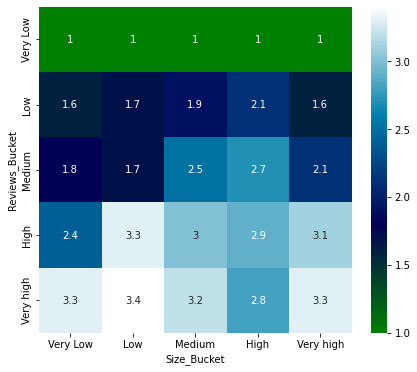

In [116]:
plt.figure(figsize = [7,6])
sns.heatmap(rex , cmap = 'ocean' , annot = True)
plt.show()

### Session 3: Additional Visualisations

#### Line Plots

In [117]:
inp2.dtypes

App                 object
Category            object
Rating             float64
Reviews              int32
Size               float64
Installs             int64
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Size_Bucket       category
Reviews_Bucket    category
dtype: object

In [118]:
inp2['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [119]:
## Extract the month from the Last Updated Date
pd.to_datetime(inp2['Last Updated']).dt.month


0       1
1       1
2       8
3       6
4       6
       ..
8615    6
8616    7
8617    7
8618    1
8619    7
Name: Last Updated, Length: 8620, dtype: int64

In [120]:
inp2['Updated_M'] = pd.to_datetime(inp2['Last Updated']).dt.month


In [121]:
## Find the average Rating across all the months
inp2.groupby('Updated_M')['Rating'].mean()


Updated_M
1     4.143842
2     4.090385
3     4.107963
4     4.148326
5     4.153375
6     4.172590
7     4.222968
8     4.271086
9     4.041406
10    4.012739
11    4.102685
12    4.065350
Name: Rating, dtype: float64

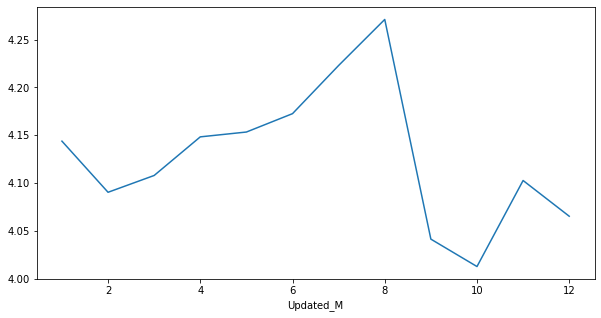

In [122]:
## Plot a line graph
plt.figure(figsize = [10,5])
inp2.groupby('Updated_M')['Rating'].mean().plot()
plt.show()

### Stacked Bar Charts

In [123]:
inp2.head(2)

App        Category  Rating  \
0  Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                             Coloring book moana  ART_AND_DESIGN     3.9   

   Reviews     Size  Installs  Type  Price Content Rating  \
0      159  19000.0     10000  Free    0.0       Everyone   
1      967  14000.0    500000  Free    0.0       Everyone   

                      Genres      Last Updated Current Ver   Android Ver  \
0               Art & Design   January 7, 2018       1.0.0  4.0.3 and up   
1  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up   

  Size_Bucket Reviews_Bucket  Updated_M  
0      Medium            Low          1  
1      Medium            Low          1

In [124]:
## Create a pivot table for Content Rating and updated Month with the values set to Installs
pd.pivot_table(data = inp2 , index = 'Updated_M' , columns = 'Content Rating' , values = 'Installs' , aggfunc = np.sum)

Content Rating    Everyone  Everyone 10+  Mature 17+        Teen
Updated_M                                                       
1                925387390     105282000     9701210    44159010
2                545372005      19821000    13021500    39597710
3                695365520      30322510     9111100    79850310
4                973371180      23300000     5259000   161619410
5               1861067800     118173500    50140100   202689600
6               2427170505     317727100   145257200   415716600
7               7771109680     456556000   419491910  1943556800
8               5930943320     215821000   312981700  1257855650
9                260340410      24931100     2201010    22483100
10               258279680      23101000     3160000    45629210
11               625424710      60310000     1070100    31261100
12               567105770       8410000    12960100    51707100

In [125]:
##Store the table in a separate variable
monthly = pd.pivot_table(data = inp2 , index = 'Updated_M' , columns = 'Content Rating' , values = 'Installs' , aggfunc = np.sum)

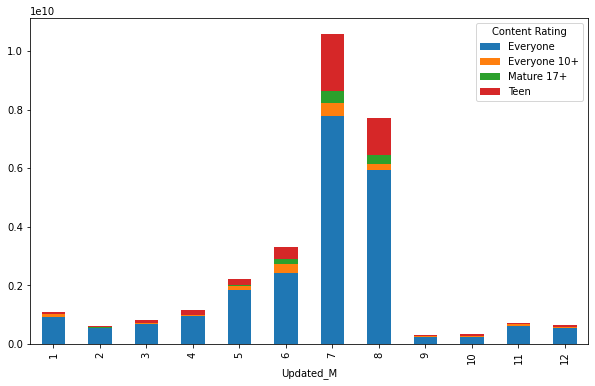

In [126]:
##Plot the stacked bar chart.
monthly.plot( kind = 'bar' , stacked = 'True' , figsize = [10,6])
plt.show()

In [127]:
##Plot the stacked bar chart again wrt to the proportions.
monthly[['Everyone' , 'Everyone 10+' , 'Mature 17+', 'Teen']].apply(lambda x: x/x.sum() , axis = 1)


Content Rating  Everyone  Everyone 10+  Mature 17+      Teen
Updated_M                                                   
1               0.853262      0.097076    0.008945  0.040717
2               0.882747      0.032083    0.021077  0.064093
3               0.853576      0.037222    0.011184  0.098018
4               0.836553      0.020025    0.004520  0.138902
5               0.833785      0.052943    0.022463  0.090808
6               0.734200      0.096110    0.043939  0.125751
7               0.733766      0.043109    0.039609  0.183515
8               0.768496      0.027965    0.040554  0.162985
9               0.839928      0.080434    0.007101  0.072537
10              0.782263      0.069967    0.009571  0.138199
11              0.870985      0.083990    0.001490  0.043535
12              0.885850      0.013137    0.020244  0.080769

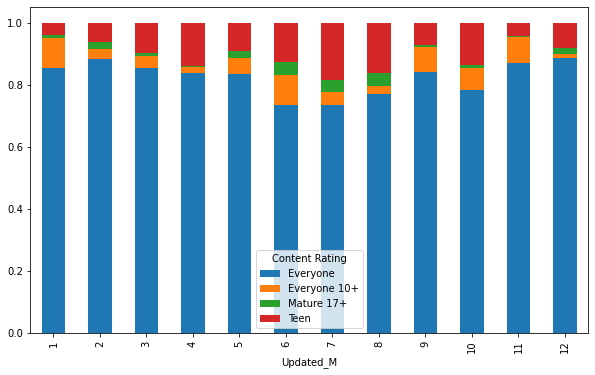

In [128]:
monthly_perc = monthly[['Everyone' , 'Everyone 10+' , 'Mature 17+', 'Teen']].apply(lambda x: x/x.sum() , axis = 1)
monthly_perc.plot( kind = 'bar' , stacked = 'True' , figsize = [10,6])
plt.show()

### Plotly

In [136]:
#Install plotly
import plotly
import plotly.express as px  # A Python Library

In [139]:
#Take the table you want to plot in a separate variable
hey = inp2.groupby(['Updated_M'])[['Rating']].mean()
hey.reset_index(inplace = True)

In [140]:
hey

Updated_M    Rating
0           1  4.143842
1           2  4.090385
2           3  4.107963
3           4  4.148326
4           5  4.153375
5           6  4.172590
6           7  4.222968
7           8  4.271086
8           9  4.041406
9          10  4.012739
10         11  4.102685
11         12  4.065350

In [141]:
#Prepare the plot
fig = px.line( hey , x = 'Updated_M' , y = 'Rating' , title = 'Monthly Average Rating')
fig.show()

# Thank You